<a href="https://colab.research.google.com/github/lakshmi0512/FIFA_Dataset_Analysis/blob/main/fifa_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 2
 
# FIFA Dataset Analysis

# Web Scraping

Importing Libraries

In [1]:
# NumPy -> To perform the Mathematical operations
import numpy as np

# Pandas -> Data Manipulation tool
import pandas as pd

# Matplotlib -> Data Visualisation tool
import matplotlib.pyplot as plt

# Seaborn -> Data Visualisation tool
import seaborn as sns

# SQLite -> Server-less Database
import sqlite3

# BeautifulSoup -> Pulling data out of HTML and XML files
from bs4 import BeautifulSoup

#Request -> call requests
import requests

# RegEX -> Data Cleaning
import re

# Steps

1. Import all the libraries for Web Scraping, Data Visualisation, Analysis
2. Scrape the Data
3. Data Exploration, Data Cleaning, Data Manipulation
4. Convert it into the DataFrame
5. Perform the Analysis (EDA)

# Performing the Data Scraping from the Web
Link: https://sofifa.com/players?offset=[1-10]

In [2]:
for i in range (1,15):
  url = f'https://sofifa.com/players?offset={i}'
  req = requests.get(url)

In [3]:
req

<Response [200]>

In [4]:
soup = BeautifulSoup(req.content)

In [5]:
soup.prettify()

'<!DOCTYPE html>\n<html lang="en-US">\n <head>\n  <title>\n   Players FIFA 21 Aug 6, 2021 SoFIFA\n  </title>\n  <meta charset="utf-8"/>\n  <meta content="VGaFvm9Qm-qhCd2LCDi8QKWXNPSrVE2SJ2iT8c3vI1g" name="google-site-verification"/>\n  <meta content="FIFA 21 player ratings on Aug 6, 2021" name="description"/>\n  <meta content="Khachin Borjigin" name="author"/>\n  <meta content="2009 - 2021 SoFIFA.com" name="copyright"/>\n  <meta content="light" name="twitter:widgets:theme"/>\n  <meta content="#e6e6e6" name="twitter:widgets:border-color"/>\n  <link href="/launcher-icon.png" rel="shortcut icon"/>\n  <link href="/launcher-icon.png" rel="apple-touch-icon"/>\n  <link href="https://cdn.sofifa.com" rel="preconnect"/>\n  <link href="https://cdn.sofifa.com" rel="dns-prefetch"/>\n  <link href="https://pagead2.googlesyndication.com" rel="preconnect"/>\n  <link href="https://pagead2.googlesyndication.com" rel="dns-prefetch"/>\n  <script async="" crossorigin="anonymous" src="https://pagead2.googles

# Data Exploration, Data Cleaning, Data Manipulation

In [6]:
columns = ['Image_link','Name','Age','OVA','POT', 'Team', 
           'Duration', 'Value', 'Wage', 'Total_stats', 'Hits']

In [7]:
def  fifa_datset(url):
  fifa_final = pd.DataFrame()

  for i in range(1,11):
    # url = f'https://sofifa.com/players?offset={i}'
    url = url+str(i)
    req = requests.get(url)
    soup = BeautifulSoup(req.content)
    lists = [[] for _ in range(11)]

    for i in soup.findAll('tr'):
      Image_link = re.sub('<img.*data-srcset="| .*/>','',str(i.find('img',{"class":"player-check"})))
      Name = re.sub('<a.*data-tooltip="|" href.*a>','',str(i.find('a',{"class":"tooltip"})))
      Age = re.sub('<td.*">|</td>','',str(i.find('td',{"class":"col"})))
      OVA = re.sub('<td.*">|</td>|<.*>','',str(i.find('td',{"class":"col col-oa"})))
      POT = re.sub('<td.*">|</td>|<.*>','',str(i.find('td',{"class":"col col-pt"})))
      Team = re.sub('<a.*title="|">.*/>|<a.*/">|</a>|amp;','',str(i.findAll('a')[-1]))
      Duration = re.sub('<div.*\n|</div>| <.*','',str(i.find('div',{"class":"sub"})))
      Value = re.sub('<td.*">€|M</td>|</td>|K','',str(i.find('td',{"class":"col col-vl"})))
      Wage = re.sub('<td.*">€|K</td>|</td>','',str(i.find('td',{"class":"col col-wg"})))
      Total_stats = re.sub('<td.*">|</.*td>','',str(i.find('td',{"class":"col col-tt"})))
      Hits = re.sub('<td.*">\n|K</td>|</td>','',str(i.find('td',{"class":"col-comment"})))

      lists[0].append(Image_link)
      lists[1].append(Name)
      lists[2].append(Age)
      lists[3].append(OVA)
      lists[4].append(POT)
      lists[5].append(Team)
      lists[6].append(Duration)
      lists[7].append(Value)
      lists[8].append(Wage)
      lists[9].append(Total_stats)
      lists[10].append(Hits)

    fifa = pd.DataFrame({'Image_link':lists[0], 'Name':lists[1], 'Age':lists[2], 
                      'OVA':lists[3], 'POT':lists[4], 'Team':lists[5],
                      'Duration':lists[6], 'Value':lists[7], 'Wage':lists[8], 
                      'Total_stats':lists[9], 'Hits':lists[10]})
    
    fifa.drop(0, inplace=True)
    
    fifa['Age'] = pd.to_numeric(fifa['Age'])
    fifa['OVA'] = pd.to_numeric(fifa['OVA'])
    fifa['POT'] = pd.to_numeric(fifa['POT'])
    fifa['Value'] = pd.to_numeric(fifa['Value'])
    fifa['Wage'] = pd.to_numeric(fifa['Wage'])
    fifa['Total_stats'] = pd.to_numeric(fifa['Total_stats'])
    fifa['Hits'] = pd.to_numeric(fifa['Hits'])

    fifa_final = fifa_final.append(fifa, ignore_index = True)
  
  return fifa_final


In [8]:
fifa_final = pd.DataFrame()

for i in range(1,11):
  url = f'https://sofifa.com/players?offset={i}'
  req = requests.get(url)
  soup = BeautifulSoup(req.content)
  lists = [[] for _ in range(11)]

  for i in soup.findAll('tr'):
    Image_link = re.sub('<img.*data-srcset="| .*/>','',str(i.find('img',{"class":"player-check"})))
    Name = re.sub('<a.*data-tooltip="|" href.*a>','',str(i.find('a',{"class":"tooltip"})))
    Age = re.sub('<td.*">|</td>','',str(i.find('td',{"class":"col"})))
    OVA = re.sub('<td.*">|</td>|<.*>','',str(i.find('td',{"class":"col col-oa"})))
    POT = re.sub('<td.*">|</td>|<.*>','',str(i.find('td',{"class":"col col-pt"})))
    Team = re.sub('<a.*title="|">.*/>|<a.*/">|</a>|amp;','',str(i.findAll('a')[-1]))
    Duration = re.sub('<div.*\n|</div>| <.*','',str(i.find('div',{"class":"sub"})))
    Value = re.sub('<td.*">€|M</td>|</td>|K','',str(i.find('td',{"class":"col col-vl"})))
    Wage = re.sub('<td.*">€|K</td>|</td>','',str(i.find('td',{"class":"col col-wg"})))
    Total_stats = re.sub('<td.*">|</.*td>','',str(i.find('td',{"class":"col col-tt"})))
    Hits = re.sub('<td.*">\n|K</td>|</td>','',str(i.find('td',{"class":"col-comment"})))

    lists[0].append(Image_link)
    lists[1].append(Name)
    lists[2].append(Age)
    lists[3].append(OVA)
    lists[4].append(POT)
    lists[5].append(Team)
    lists[6].append(Duration)
    lists[7].append(Value)
    lists[8].append(Wage)
    lists[9].append(Total_stats)
    lists[10].append(Hits)

  fifa = pd.DataFrame({'Image_link':lists[0], 'Name':lists[1], 'Age':lists[2], 
                    'OVA':lists[3], 'POT':lists[4], 'Team':lists[5],
                    'Duration':lists[6], 'Value':lists[7], 'Wage':lists[8], 
                    'Total_stats':lists[9], 'Hits':lists[10]})
  
  fifa.drop(0, inplace=True)
  
  fifa['Age'] = pd.to_numeric(fifa['Age'])
  fifa['OVA'] = pd.to_numeric(fifa['OVA'])
  fifa['POT'] = pd.to_numeric(fifa['POT'])
  fifa['Value'] = pd.to_numeric(fifa['Value'])
  fifa['Wage'] = pd.to_numeric(fifa['Wage'])
  fifa['Total_stats'] = pd.to_numeric(fifa['Total_stats'])
  fifa['Hits'] = pd.to_numeric(fifa['Hits'])

  fifa_final = fifa_final.append(fifa, ignore_index = True)

In [9]:
fifa_600 = fifa_final
fifa_598 = fifa_datset("https://sofifa.com/players?offset=")

In [10]:
print(fifa_600.shape)
fifa_598.shape

(600, 11)


(600, 11)

In [11]:
print(fifa_600.columns)
fifa_598.columns

Index(['Image_link', 'Name', 'Age', 'OVA', 'POT', 'Team', 'Duration', 'Value',
       'Wage', 'Total_stats', 'Hits'],
      dtype='object')


Index(['Image_link', 'Name', 'Age', 'OVA', 'POT', 'Team', 'Duration', 'Value',
       'Wage', 'Total_stats', 'Hits'],
      dtype='object')

In [12]:
fifa_598.isnull().sum(axis=0)

Image_link     0
Name           0
Age            0
OVA            0
POT            0
Team           0
Duration       0
Value          0
Wage           0
Total_stats    0
Hits           0
dtype: int64

In [13]:
fifa_600.isnull().sum(axis=0)

Image_link     0
Name           0
Age            0
OVA            0
POT            0
Team           0
Duration       0
Value          0
Wage           0
Total_stats    0
Hits           0
dtype: int64

In [14]:
pd.concat([fifa_600,fifa_598]).drop_duplicates(keep=False)

,Image_link,Name,Age,OVA,POT,Team,Duration,Value,Wage,Total_stats,Hits
118,https://cdn.sofifa.com/players/255/475/21_120.png,Antony Matheus dos Santos,20,79,88,Ajax,2020 ~ 2025,38.5,17,1947,487.0
119,https://cdn.sofifa.com/players/245/367/21_120.png,Xavi Simons,17,65,84,Paris Saint-Germain,2019 ~ 2022,1.8,2,1656,486.0
120,https://cdn.sofifa.com/players/221/841/21_120.png,Adam Armstrong,23,75,82,Blackburn Rovers,2018 ~ 2022,11.5,38,1960,343.0
121,https://cdn.sofifa.com/players/247/360/21_120.png,Leonidas Stergiou,18,67,86,FC St. Gallen,2019 ~ 2024,2.4,1,1531,343.0
122,https://cdn.sofifa.com/players/190/717/21_120.png,Michail Antonio,30,79,79,West Ham United,2015 ~ 2023,17.0,51,2121,342.0
...,...,...,...,...,...,...,...,...,...,...,...
296,https://cdn.sofifa.com/players/230/302/21_120.png,Josué Durval da Feira Cunha,28,71,71,Goiás,2019 ~ 2023,1.9,11,1772,7.0
297,https://cdn.sofifa.com/players/230/337/21_120.png,Andeson Jaime Trigo Gonçalves,32,77,77,Fluminense,2019 ~ 2023,7.5,23,2087,7.0
298,https://cdn.sofifa.com/players/230/339/21_120.png,Adolfo Heitor Padilha Alves,28,74,74,Bahia,2019 ~ 2023,3.8,12,1890,7.0
299,https://cdn.sofifa.com/players/230/373/21_120.png,Nicolás Evandro Filheiro Stein,24,76,76,São Paulo,2019 ~ 2023,8.5,30,1939,7.0


In [15]:
fifa_600.iloc[-1]

Image_link     https://cdn.sofifa.com/players/234/396/21_120.png
Name                                             Alphonso Davies
Age                                                           19
OVA                                                           81
POT                                                           89
Team                                           FC Bayern München
Duration                                             2019 ~ 2025
Value                                                         53
Wage                                                          40
Total_stats                                                 2106
Hits                                                         492
Name: 599, dtype: object

In [16]:
fifa_598.iloc[-1]

Image_link     https://cdn.sofifa.com/players/245/992/21_120.png
Name                                               Billy Gilmour
Age                                                           19
OVA                                                           71
POT                                                           86
Team                                                     Chelsea
Duration                                             2018 ~ 2023
Value                                                        4.4
Wage                                                          25
Total_stats                                                 1812
Hits                                                         546
Name: 599, dtype: object

In [17]:
fifa_600['Age'].equals(fifa_598['Age'])

False

In [18]:
fifa_600

,Image_link,Name,Age,OVA,POT,Team,Duration,Value,Wage,Total_stats,Hits
0,https://cdn.sofifa.com/players/230/965/21_120.png,Nahitan Nández,24,77,82,Cagliari,2019 ~ 2024,16.0,29,2078,3.5
1,https://cdn.sofifa.com/players/236/600/21_120.png,Japhet Tanganga,21,73,83,Tottenham Hotspur,2017 ~ 2025,6.5,37,1747,3.4
2,https://cdn.sofifa.com/players/206/517/21_120.png,Jack Grealish,24,83,86,Aston Villa,2012 ~ 2025,49.5,82,2015,3.3
3,https://cdn.sofifa.com/players/200/104/21_120.png,Heung Min Son,27,89,89,Tottenham Hotspur,2015 ~ 2023,110.0,210,2148,3.0
4,https://cdn.sofifa.com/players/241/042/21_120.png,Oliver Skipp,19,74,85,Norwich City,"Jun 30, 2021",8.5,30,1762,2.5
...,...,...,...,...,...,...,...,...,...,...,...
595,https://cdn.sofifa.com/players/243/627/21_120.png,Yacine Adli,19,72,82,FC Girondins de Bordeaux,2019 ~ 2023,5.0,12,1918,508.0
596,https://cdn.sofifa.com/players/237/692/21_120.png,Phil Foden,20,83,92,Manchester City,2016 ~ 2024,79.5,115,2035,507.0
597,https://cdn.sofifa.com/players/233/064/21_120.png,Mason Mount,21,82,88,Chelsea,2016 ~ 2024,49.0,81,2066,506.0
598,https://cdn.sofifa.com/players/204/529/21_120.png,Michy Batshuayi,26,76,77,Crystal Palace,"Jun 30, 2021",9.0,77,1843,495.0


In [19]:
fifa_600.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Image_link   600 non-null    object 
 1   Name         600 non-null    object 
 2   Age          600 non-null    int64  
 3   OVA          600 non-null    int64  
 4   POT          600 non-null    int64  
 5   Team         600 non-null    object 
 6   Duration     600 non-null    object 
 7   Value        600 non-null    float64
 8   Wage         600 non-null    int64  
 9   Total_stats  600 non-null    int64  
 10  Hits         600 non-null    float64
dtypes: float64(2), int64(5), object(4)
memory usage: 51.7+ KB


In [20]:
# Removing Columns - Image_link & Duration
fifa_600.drop(['Image_link','Duration'],inplace = True,axis=1)

In [21]:
fifa_600.head(20)

,Name,Age,OVA,POT,Team,Value,Wage,Total_stats,Hits
0,Nahitan Nández,24,77,82,Cagliari,16.0,29,2078,3.5
1,Japhet Tanganga,21,73,83,Tottenham Hotspur,6.5,37,1747,3.4
2,Jack Grealish,24,83,86,Aston Villa,49.5,82,2015,3.3
3,Heung Min Son,27,89,89,Tottenham Hotspur,110.0,210,2148,3.0
4,Oliver Skipp,19,74,85,Norwich City,8.5,30,1762,2.5
5,Trevoh Chalobah,20,71,79,FC Lorient,3.9,29,1696,2.1
6,Éverton Augusto de Barros Ribeiro,26,81,83,Brazil,0.0,0,2005,2.1
7,Erling Haaland,19,87,93,Borussia Dortmund,122.5,72,2086,1.6
8,Memphis Depay,26,84,85,Olympique Lyonnais,50.5,105,2078,1.6
9,Pedro González López,17,77,91,FC Barcelona,24.0,15,1947,1.6


In [22]:
fifa_600.tail(9)

,Name,Age,OVA,POT,Team,Value,Wage,Total_stats,Hits
591,Giovanni Reyna,17,76,87,Borussia Dortmund,15.5,6,1893,533.0
592,Robert Kenedy Nunes do Nascimento,24,77,80,Granada CF,14.5,66,2021,532.0
593,Romelu Lukaku,27,86,86,Inter,73.5,175,2032,517.0
594,Martin Ødegaard,21,83,89,Arsenal,58.5,135,2095,508.0
595,Yacine Adli,19,72,82,FC Girondins de Bordeaux,5.0,12,1918,508.0
596,Phil Foden,20,83,92,Manchester City,79.5,115,2035,507.0
597,Mason Mount,21,82,88,Chelsea,49.0,81,2066,506.0
598,Michy Batshuayi,26,76,77,Crystal Palace,9.0,77,1843,495.0
599,Alphonso Davies,19,81,89,FC Bayern München,53.0,40,2106,492.0


In [23]:
fifa_600.describe()

,Age,OVA,POT,Value,Wage,Total_stats,Hits
count,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000
mean,21.413333,77.606667,85.925000,33.178167,97.746667,1913.148333,490.513667
std,4.183099,6.743967,4.609569,38.736811,140.877322,245.031563,305.279212
min,16.000000,62.000000,71.000000,0.000000,0.000000,965.000000,1.000000
25%,18.000000,74.000000,84.000000,8.125000,8.000000,1802.000000,3.300000
50%,21.000000,77.000000,87.000000,17.000000,37.000000,1947.000000,572.000000
75%,24.000000,82.000000,89.000000,37.000000,101.250000,2078.000000,694.750000
max,35.000000,93.000000,95.000000,185.500000,560.000000,2347.000000,901.000000


In [24]:
fifa_600[fifa_600['Wage']==max(fifa_600['Wage'])]['Name']

13     Lionel Messi
72     Lionel Messi
131    Lionel Messi
190    Lionel Messi
249    Lionel Messi
308    Lionel Messi
367    Lionel Messi
426    Lionel Messi
485    Lionel Messi
544    Lionel Messi
Name: Name, dtype: object

In [25]:
fifa_600.duplicated().sum(axis=0)

527

In [26]:
fifa_600.drop_duplicates(inplace=True)

In [27]:
fifa_600.describe()

,Age,OVA,POT,Value,Wage,Total_stats,Hits
count,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000
mean,21.424658,77.945205,85.972603,34.741096,93.369863,1930.342466,471.172603
std,4.048037,6.550849,4.545977,38.824380,132.156736,236.303255,307.507756
min,16.000000,62.000000,71.000000,0.000000,0.000000,965.000000,1.000000
25%,18.000000,74.000000,84.000000,9.000000,15.000000,1817.000000,3.400000
50%,21.000000,77.000000,87.000000,17.500000,37.000000,1972.000000,559.000000
75%,24.000000,82.000000,89.000000,49.000000,100.000000,2086.000000,692.000000
max,35.000000,93.000000,95.000000,185.500000,560.000000,2347.000000,901.000000


2.1 Find the youngest player

2.2 Find the oldest player

In [28]:
print(fifa_600[fifa_600['Age']==min(fifa_600['Age'])]['Name'], fifa_600[fifa_600['Age']==min(fifa_600['Age'])]['Age'])

print(fifa_600[fifa_600['Age']==max(fifa_600['Age'])]['Name'], fifa_600[fifa_600['Age']==max(fifa_600['Age'])]['Age'])

44     Rayan Cherki
48    Dane Scarlett
Name: Name, dtype: object 44    16
48    16
Name: Age, dtype: int64
45    C. Ronaldo dos Santos Aveiro
Name: Name, dtype: object 45    35
Name: Age, dtype: int64


3. List out the Top 10 players according to their POT

In [29]:
fifa_600.sort_values(by='POT', ascending=False).head(10)

,Name,Age,OVA,POT,Team,Value,Wage,Total_stats,Hits
16,Kylian Mbappé,21,90,95,Paris Saint-Germain,185.5,160,2157,1.1
13,Lionel Messi,33,93,93,FC Barcelona,103.5,560,2231,1.2
7,Erling Haaland,19,87,93,Borussia Dortmund,122.5,72,2086,1.6
419,Phil Foden,20,83,92,Manchester City,79.5,115,2035,507.0
45,C. Ronaldo dos Santos Aveiro,35,92,92,Juventus,63.0,220,2221,608.0
51,Jadon Sancho,20,87,92,Borussia Dortmund,118.5,82,2011,560.0
36,Bruno Miguel Borges Fernandes,25,88,91,Manchester United,121.0,240,2347,692.0
19,Matvey Safonov,21,72,91,Russia,0.0,0,1039,1.0
9,Pedro González López,17,77,91,FC Barcelona,24.0,15,1947,1.6
58,Frenkie de Jong,23,86,91,FC Barcelona,102.0,210,2203,537.0


In [30]:
fifa_600.sort_values(by='POT',ascending=False)['Name'].head(10)

16                     Kylian Mbappé
13                      Lionel Messi
7                     Erling Haaland
419                       Phil Foden
45      C. Ronaldo dos Santos Aveiro
51                      Jadon Sancho
36     Bruno Miguel Borges Fernandes
19                    Matvey Safonov
9               Pedro González López
58                   Frenkie de Jong
Name: Name, dtype: object

4. Create a new DataFrame with the values of columns - Name & POT

In [31]:
new_fifa = fifa_600[['Name','POT']]

In [32]:
new_fifa.head(10)

,Name,POT
0,Nahitan Nández,82
1,Japhet Tanganga,83
2,Jack Grealish,86
3,Heung Min Son,89
4,Oliver Skipp,85
5,Trevoh Chalobah,79
6,Éverton Augusto de Barros Ribeiro,83
7,Erling Haaland,93
8,Memphis Depay,85
9,Pedro González López,91


4. Plot a graph - Player's Name V/s Player's POT


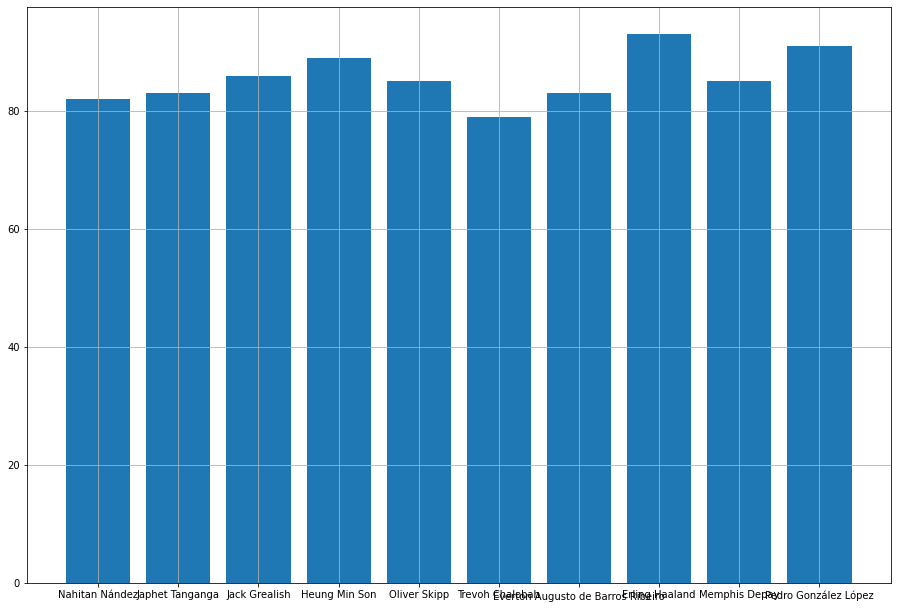

In [33]:
fig = plt.figure()
plt = fig.add_axes([1,1,2,2])

x = new_fifa['Name'].head(10)
y = new_fifa['POT'].head(10)
plt.bar(x,y)
plt.grid()

5. Plot a graph - Player's Name V/s Player's Wage

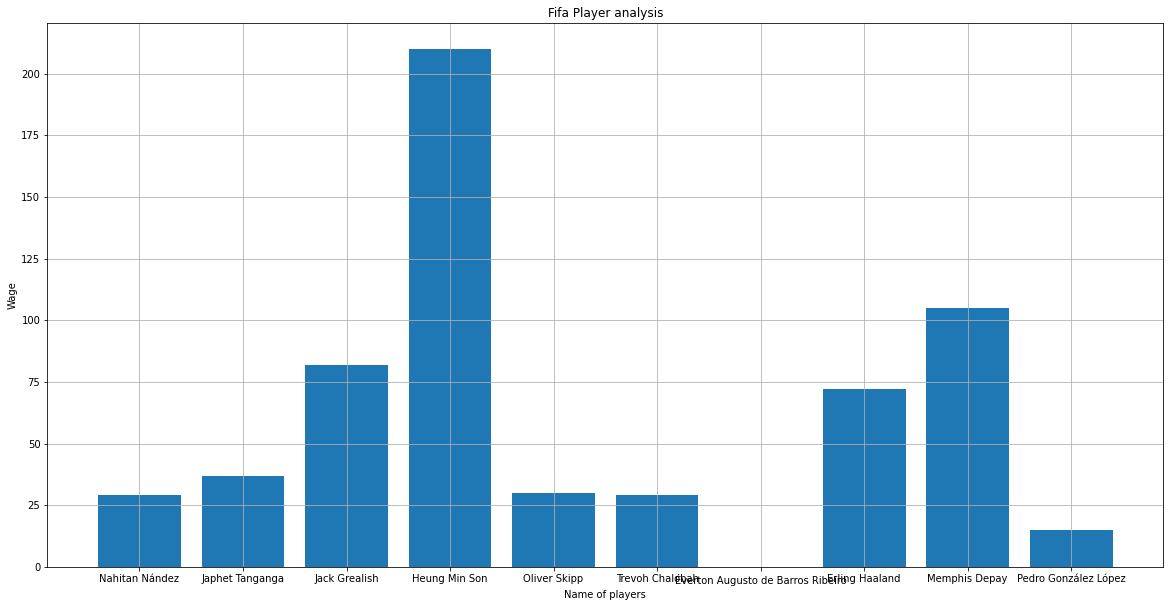

In [34]:
import matplotlib.pyplot as plt


xpoints = fifa_600['Name'][:10]
ypoints = fifa_600['Wage'][:10]
plt.figure(figsize=(20,10))
plt.xlabel("Name of players")
plt.ylabel("Wage")
plt.title("Fifa Player analysis")
plt.grid()
plt.bar(xpoints, ypoints)
plt.show()


6. Find the player who has scored highest number of goals.

In [35]:
fifa_600

,Name,Age,OVA,POT,Team,Value,Wage,Total_stats,Hits
0,Nahitan Nández,24,77,82,Cagliari,16.0,29,2078,3.5
1,Japhet Tanganga,21,73,83,Tottenham Hotspur,6.5,37,1747,3.4
2,Jack Grealish,24,83,86,Aston Villa,49.5,82,2015,3.3
3,Heung Min Son,27,89,89,Tottenham Hotspur,110.0,210,2148,3.0
4,Oliver Skipp,19,74,85,Norwich City,8.5,30,1762,2.5
...,...,...,...,...,...,...,...,...,...
468,Gabriel Teodoro Martinelli Silva,19,75,87,Arsenal,13.5,36,1869,551.0
479,Mason Mount,21,82,88,Chelsea,49.0,81,2066,506.0
518,Bukayo Saka,18,79,88,Arsenal,37.0,29,2034,592.0
539,Michy Batshuayi,26,76,77,Crystal Palace,9.0,77,1843,495.0


In [36]:
fifa_600[fifa_600['Hits']==max(fifa_600['Hits'])]['Name']

20    Eric García Martret
Name: Name, dtype: object

In [37]:
print(fifa_600[fifa_600['Hits']==max(fifa_600['Hits'])]['Name'],fifa_600[fifa_600['Hits']==max(fifa_600['Hits'])]['Hits'])

20    Eric García Martret
Name: Name, dtype: object 20    901.0
Name: Hits, dtype: float64


In [38]:
fifa_600[fifa_600['Hits']==max(fifa_600['Hits'])]['Name']

20    Eric García Martret
Name: Name, dtype: object

7.  Find all the players whose Potential is more than equal to 90


In [39]:
fifa_600[fifa_600['POT']>=90]['Name']

7                     Erling Haaland
9               Pedro González López
13                      Lionel Messi
16                     Kylian Mbappé
19                    Matvey Safonov
35                    Anssumane Fati
36     Bruno Miguel Borges Fernandes
45      C. Ronaldo dos Santos Aveiro
51                      Jadon Sancho
58                   Frenkie de Jong
212    Bruno Miguel Borges Fernandes
419                       Phil Foden
Name: Name, dtype: object

8. Find all the players whose Potential is more than 90 and the age < 20


In [40]:
fifa_600[(fifa_600['POT']>90) & (fifa_600['Age']<20) ]['Name']

7          Erling Haaland
9    Pedro González López
Name: Name, dtype: object

9. Find all the players whose values >10 but wage <50

In [41]:
fifa_600[(fifa_600['Value']>10) & (fifa_600['Wage']<50)]['Name']

0                        Nahitan Nández
9                  Pedro González López
17                      Mason Greenwood
20                  Eric García Martret
21                       Dušan Vlahović
22                      Denzel Dumfries
24                    Eduardo Camavinga
25                    Sebastián Córdova
26                  Allan Saint-Maximin
27               Emerson Leite De Souza
33     Matheus Santos Carneiro Da Cunha
35                       Anssumane Fati
37                      Jude Bellingham
38                            Ben White
41                     Ryan Gravenberch
46                          Bukayo Saka
47                   Nicolás De la Cruz
52                         Jules Koundé
54                        Florian Wirtz
55     Gabriel Teodoro Martinelli Silva
119                      Giovanni Reyna
378                   Eduardo Camavinga
468    Gabriel Teodoro Martinelli Silva
518                         Bukayo Saka
599                     Alphonso Davies


# Conclusion

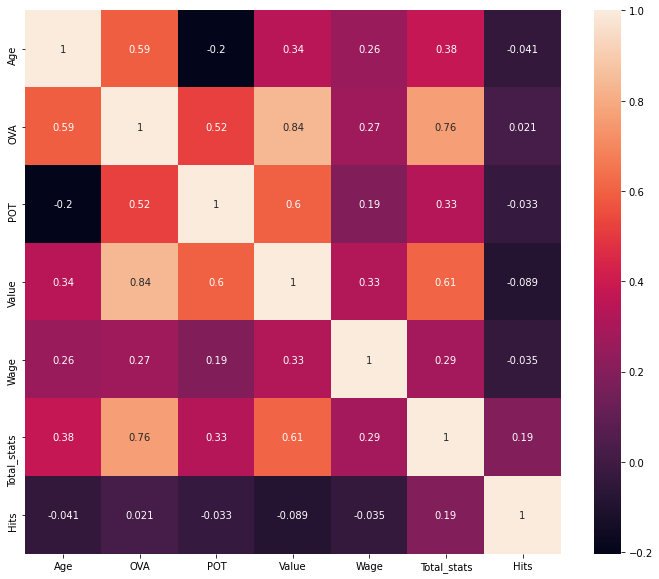

In [42]:
plt.figure(figsize=(12,10))
sns.heatmap(fifa_600.corr(), annot=True)

In [43]:
fifa_600.corr()

,Age,OVA,POT,Value,Wage,Total_stats,Hits
Age,1.000000,0.592205,-0.203893,0.342844,0.259761,0.377993,-0.040884
OVA,0.592205,1.000000,0.516235,0.836556,0.268468,0.761189,0.021304
POT,-0.203893,0.516235,1.000000,0.597341,0.189053,0.334422,-0.033404
Value,0.342844,0.836556,0.597341,1.000000,0.326049,0.607896,-0.088866
Wage,0.259761,0.268468,0.189053,0.326049,1.000000,0.285970,-0.035026
Total_stats,0.377993,0.761189,0.334422,0.607896,0.285970,1.000000,0.192722
Hits,-0.040884,0.021304,-0.033404,-0.088866,-0.035026,0.192722,1.000000
